In [1]:
import os, sys
sys.path.append('..')
sys.path.append('../TRAIN')
import numpy as np
import matplotlib.pyplot as plt
import torch
import brevitas

device = torch.device('cpu')
# %matplotlib notebook

In [2]:
sd = torch.load('gciou.pt', map_location=device)
gciou_h = sd['history']
sd = torch.load('ciou.pt', map_location=device)
ciou_h = sd['history']
sd = torch.load('ciou_no_swich.pt', map_location=device)
ciou_0_h = sd['history']

history = {'GCIoU':gciou_h,
     'CIoU':ciou_h,
     'CIoU_0':ciou_0_h
     }
gciou_h.keys()

dict_keys(['loss', 'val_loss', 'r_l', 'obj_l', 'iou_l', 'iou', 'giou', 'diou', 'ciou', 'val_r_l', 'val_obj_l', 'val_iou_l', 'val_iou', 'val_giou', 'val_diou', 'val_ciou'])

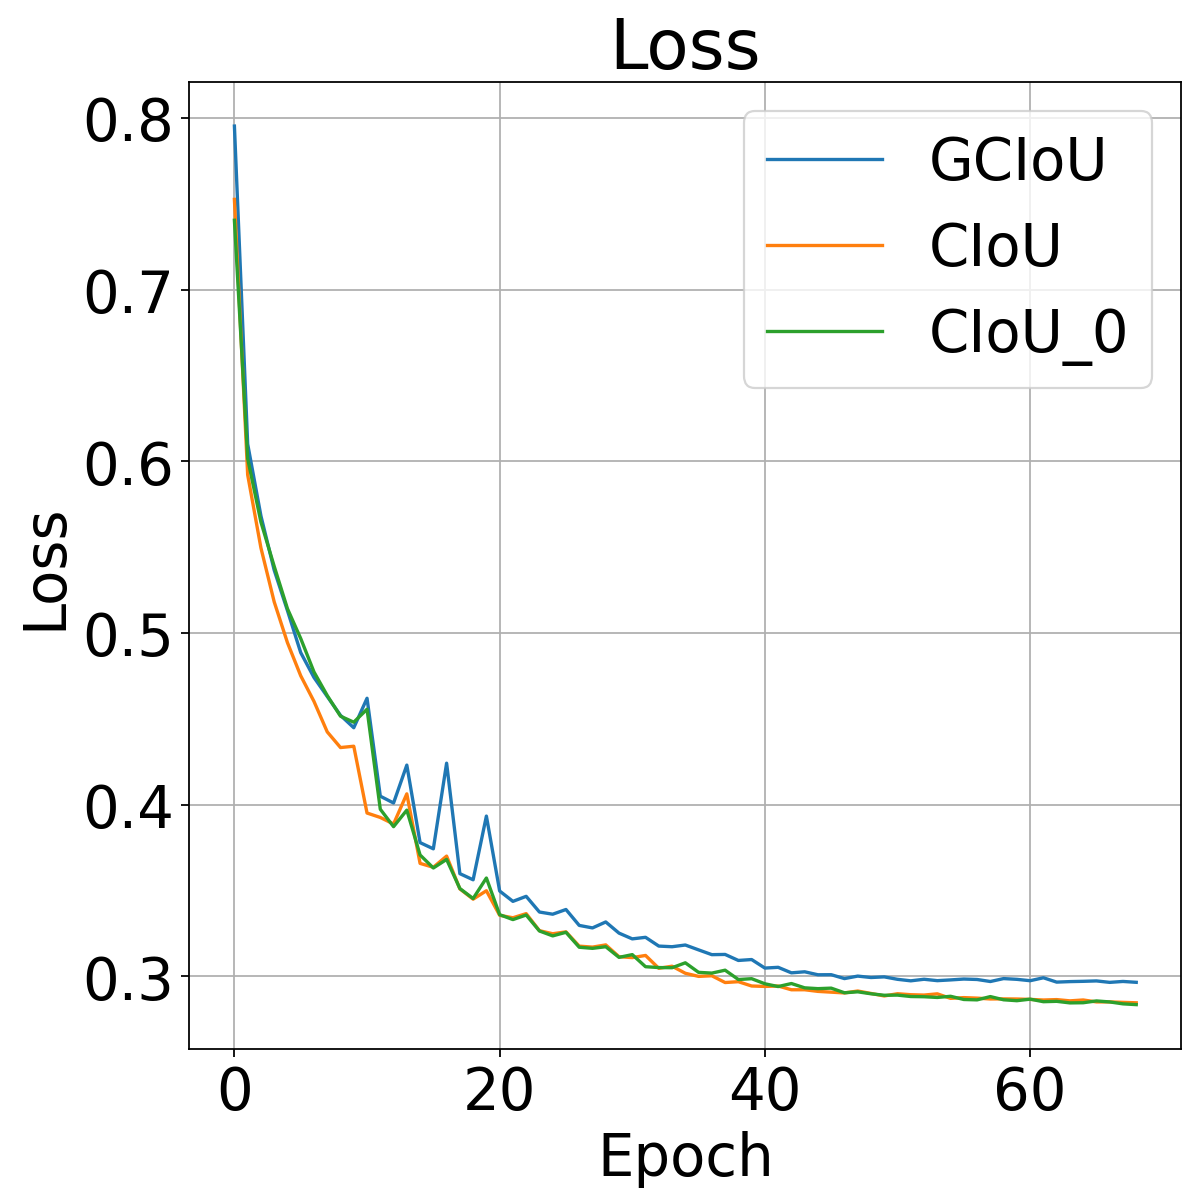

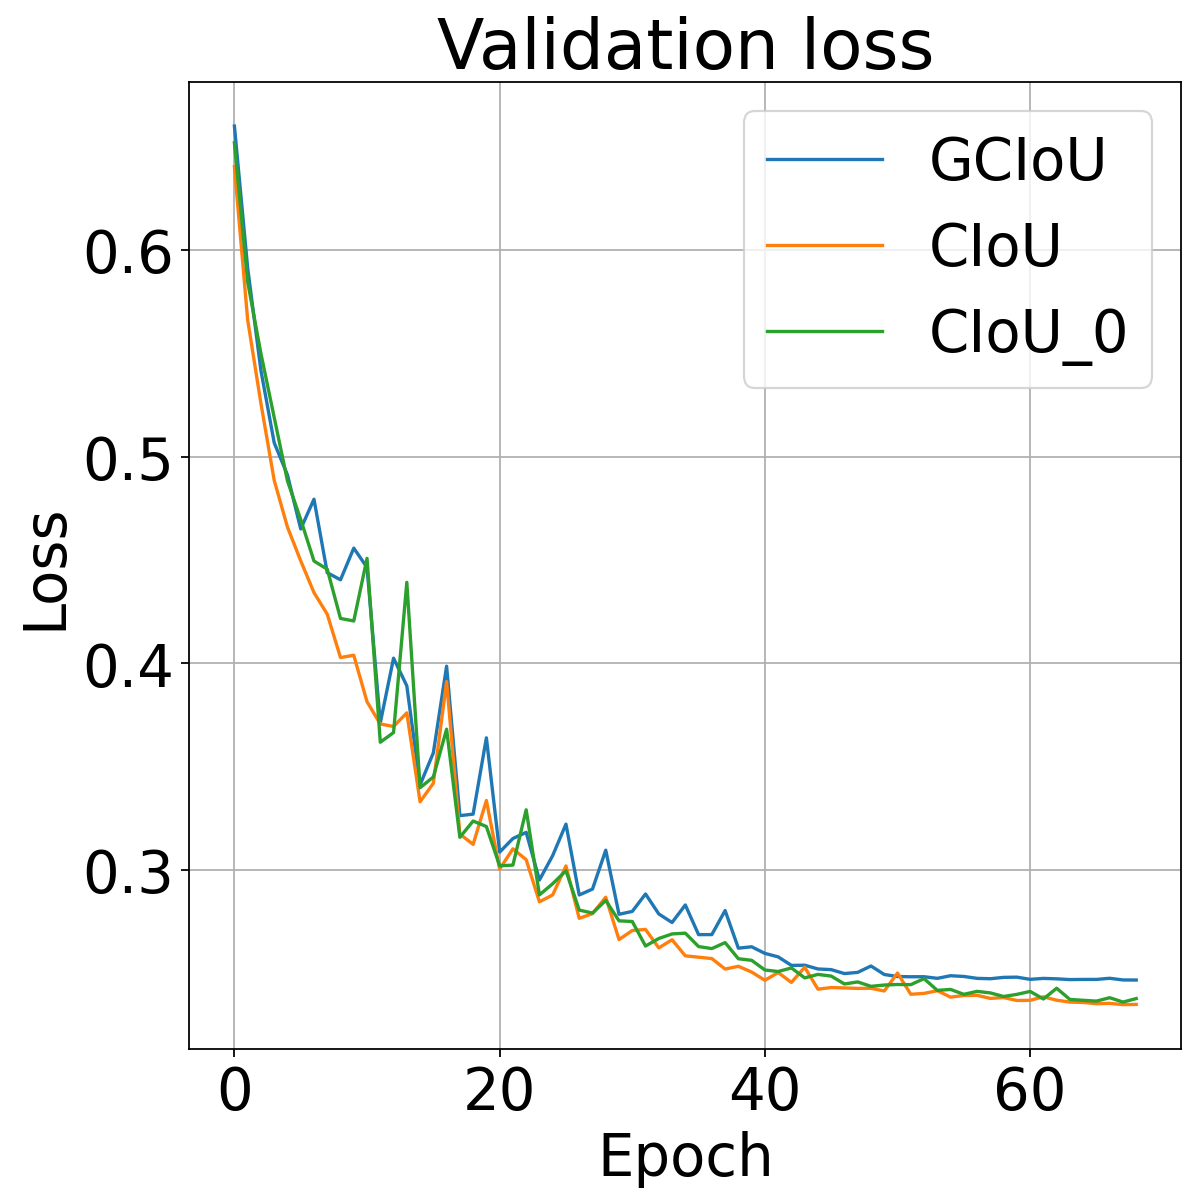

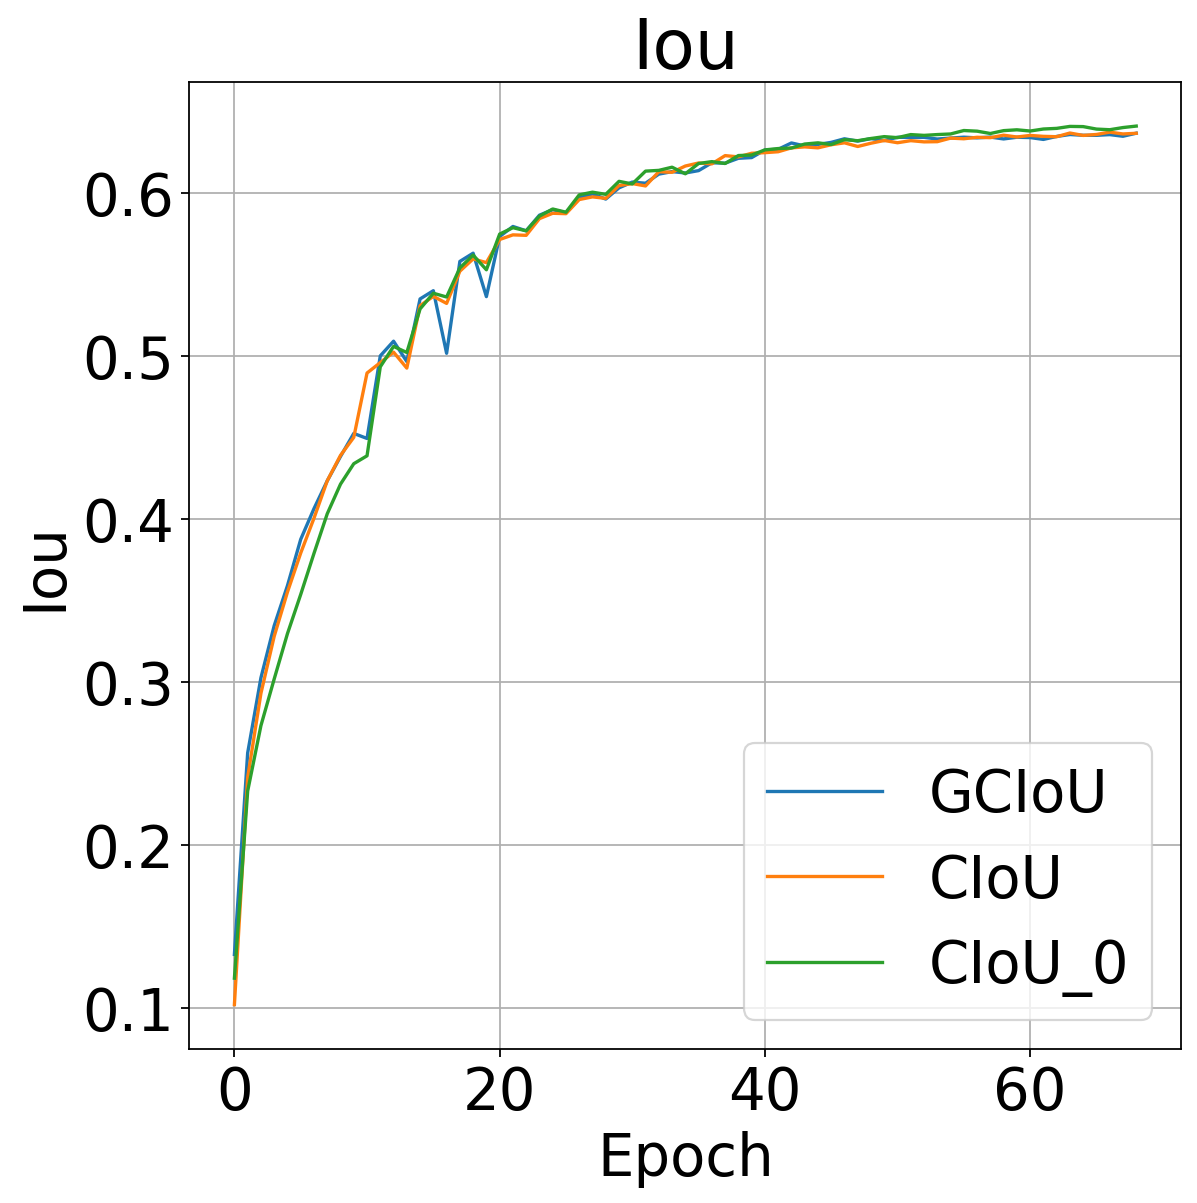

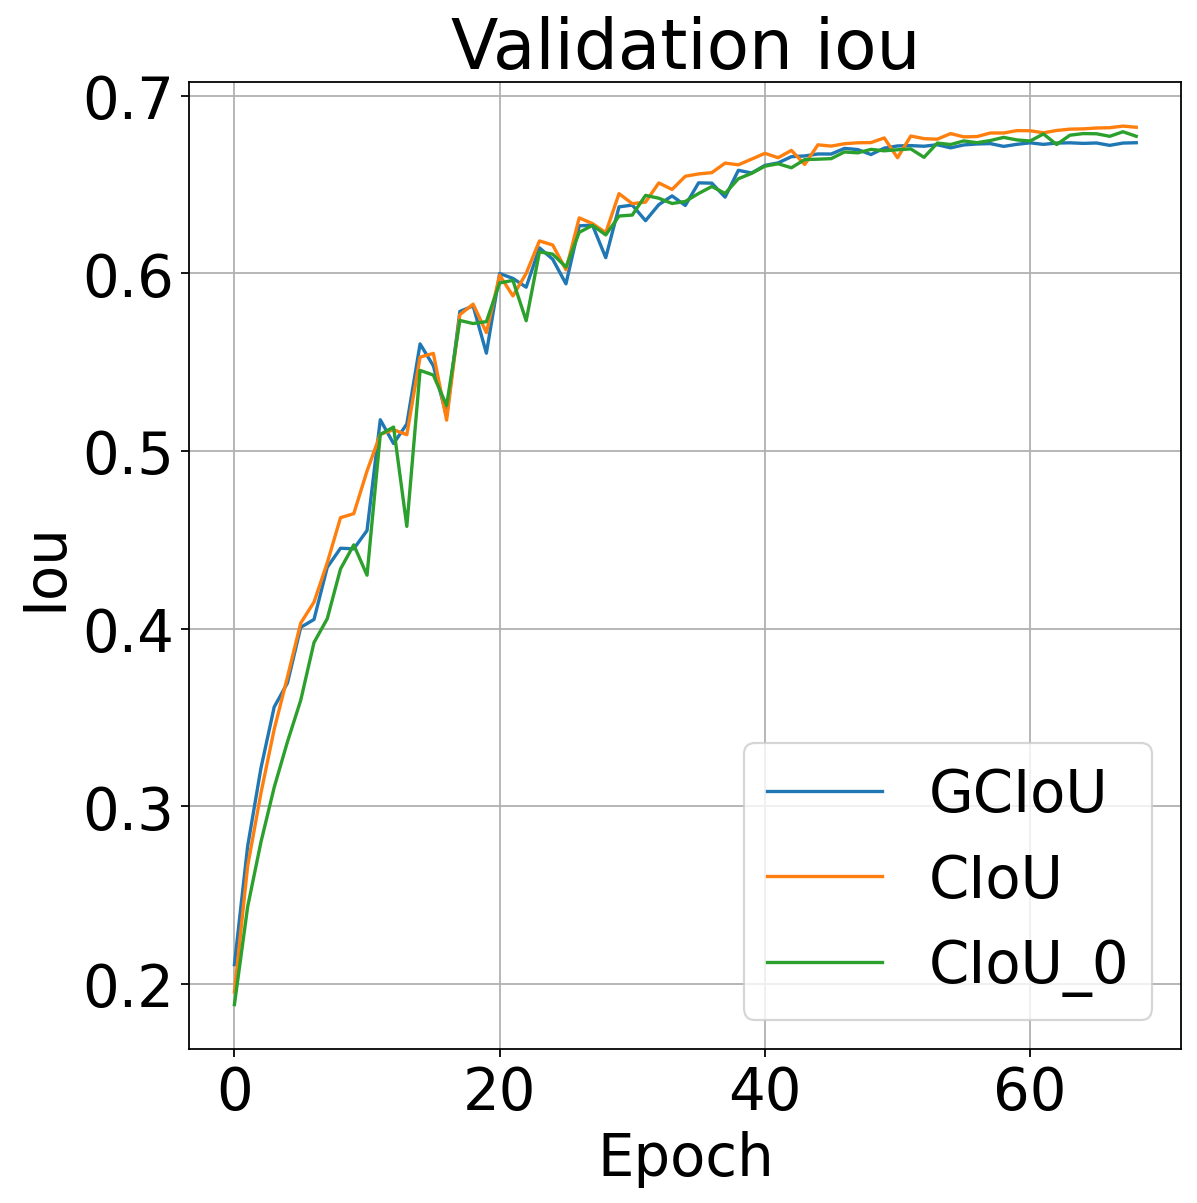

In [3]:
def plot(hist_dicts:dict, entry, title, y_axis=None):
    epoch_num = min([len(h['loss']) for h in hist_dicts.values()])
    epochs = np.arange(epoch_num)
        
    plt.figure(figsize=(8,8), dpi=160)
    font = {'family' : 'Sans',
            'weight' : 'normal',
            'size'   : 26}
    plt.rc('font', **font)
    
    for k,h in hist_dicts.items():
        v = h[entry][:epoch_num]
        plt.plot(epochs,v, label=k)
    
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(y_axis)
    plt.legend()
    plt.grid()
    plt.savefig(entry+'.png',bbox_inches='tight')
    plt.show()

# for k in [kk for kk in  history['GCIoU'].keys() if 'val' not in kk]:
for k in ['loss','iou',]:
    y_axis = str(k).capitalize()
    plot(history,k,y_axis,y_axis=y_axis)
    plot(history,'val_'+k,"Validation "+k,y_axis=y_axis)
# plot(history,'iou',"IoU",y_axis='Loss')
# plot(history,'val_iou',"Validation IoU",y_axis='Loss')

In [16]:
sd = torch.load('quant_gciou_floor.pt', map_location=device)
quant_h = sd['history']
for e in sd['additional_state']['info']:
    print(e)

LittleNet7 quant, gciou, with input (112, 208, 3)
Epoche 0:
key='DATASET_DIR' : value='/net/scratch/people/plgmicmac/VOT_VTB/Merged_dataset'
key='FOLD_STATE_PATH' : value='/net/people/plgmicmac/SOD_FINN_VAI_CUSTOM/TRAIN/folds_state_path_bbox.pkl'
key='PROJECT_DIR' : value='/net/people/plgmicmac/SOD_FINN_VAI_CUSTOM/TRAIN'
key='MODELS_DIR' : value='models_LN7_post_quant_gciou'
key='CIOU_SWITCH_ON' : value='0'
key='USE_QUANT' : value='1'
key='BN_QUANT' : value='0'
key='MODEL_TYPE' : value='LN7'
Epoche 0:
key='DATASET_DIR' : value='/net/scratch/people/plgmicmac/VOT_VTB/Merged_dataset'
key='FOLD_STATE_PATH' : value='/net/people/plgmicmac/SOD_FINN_VAI_CUSTOM/TRAIN/folds_state_path_bbox.pkl'
key='PROJECT_DIR' : value='/net/people/plgmicmac/SOD_FINN_VAI_CUSTOM/TRAIN'
key='MODELS_DIR' : value='models_LN7_post_quant_gciou'
key='CIOU_SWITCH_ON' : value='0'
key='USE_QUANT' : value='1'
key='BN_QUANT' : value='0'
key='MODEL_TYPE' : value='LN7'
Epoche 2:
key='DATASET_DIR' : value='/net/scratch/people

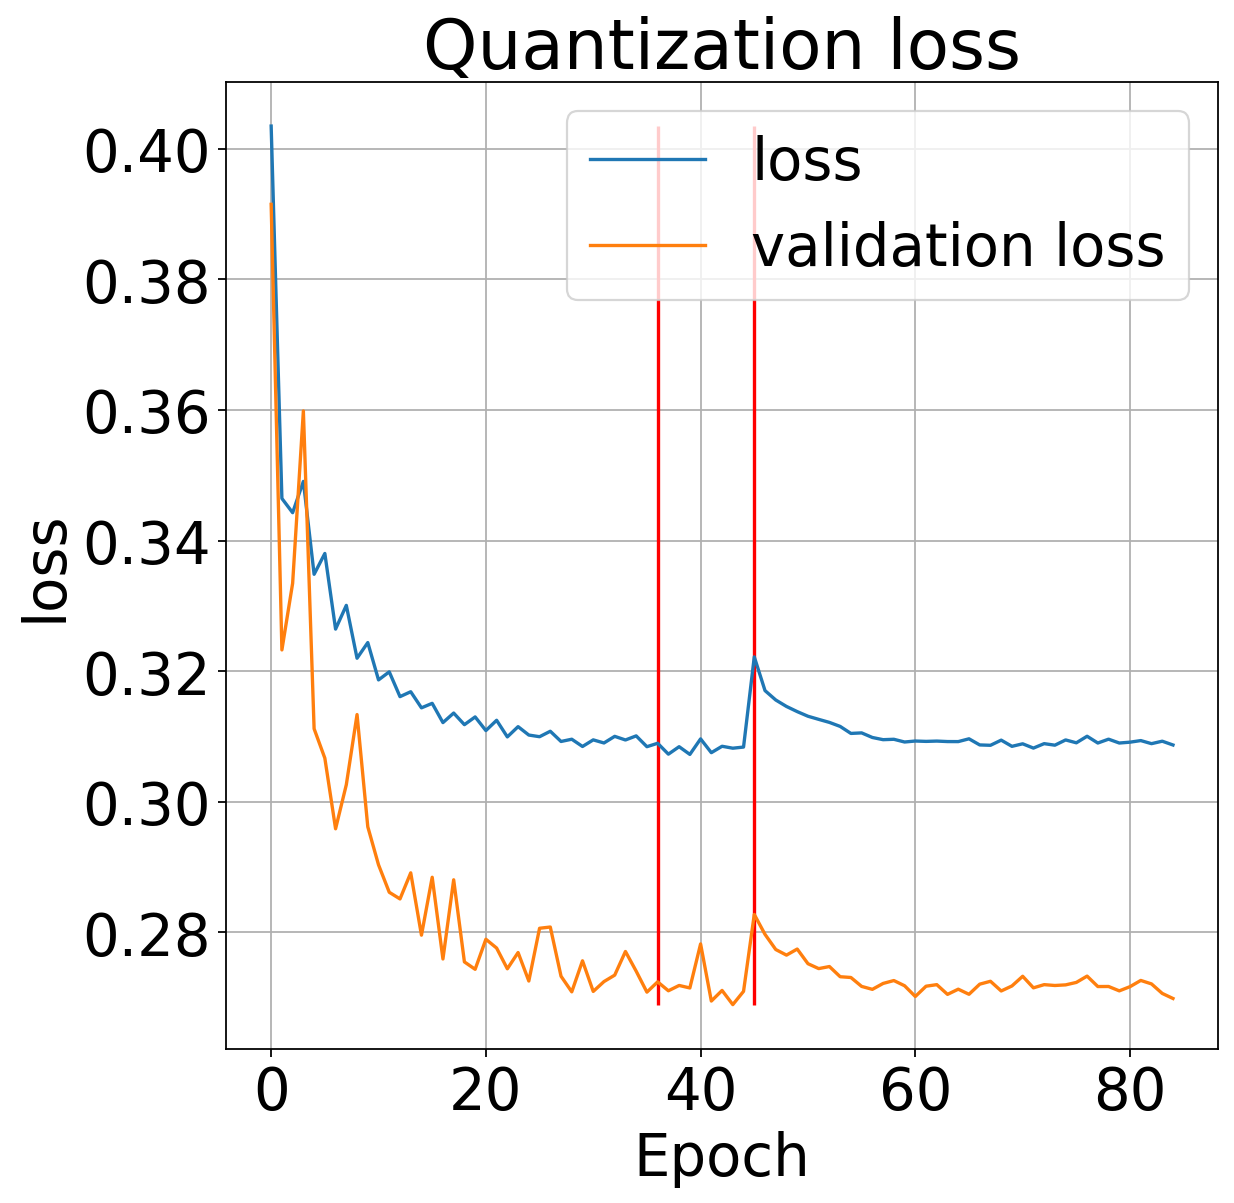

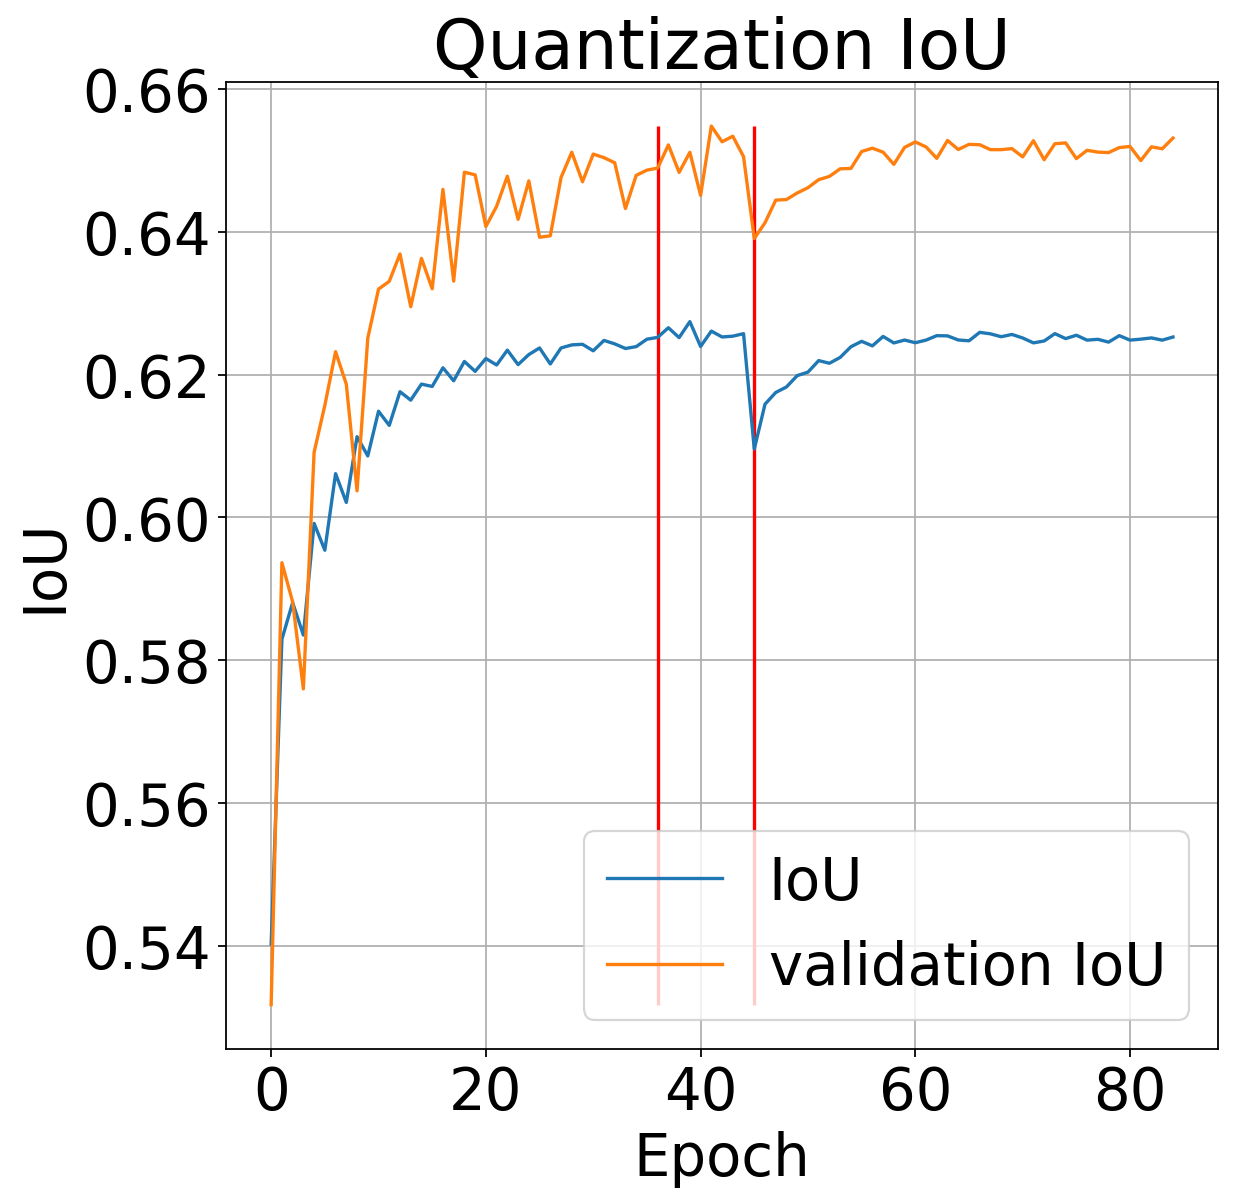

In [18]:
def plot_val(h, entry, y_axis, title, markers=[36,45]):
    epoch_num = len(h[entry])
    epochs = np.arange(epoch_num)
        
    plt.figure(figsize=(8,8), dpi=160)
    font = {'family' : 'Sans',
            'weight' : 'normal',
            'size'   : 26}
    plt.rc('font', **font)

    plt.plot(epochs,h[entry], label=y_axis)
    plt.plot(epochs,h['val_'+entry], label='validation '+y_axis)
    for m in markers:
        plt.vlines(m,min(min(h[entry]),min(h['val_'+entry])),max(max(h[entry]),max(h['val_'+entry])),colors='r')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(y_axis)
    plt.legend()
    plt.grid()
    plt.savefig(title+'_'+entry+'.png',bbox_inches='tight')
    plt.show()

plot_val(quant_h,'loss','loss', 'Quantization loss')
plot_val(quant_h,'iou','IoU', 'Quantization IoU')

In [10]:
%matplotlib widget

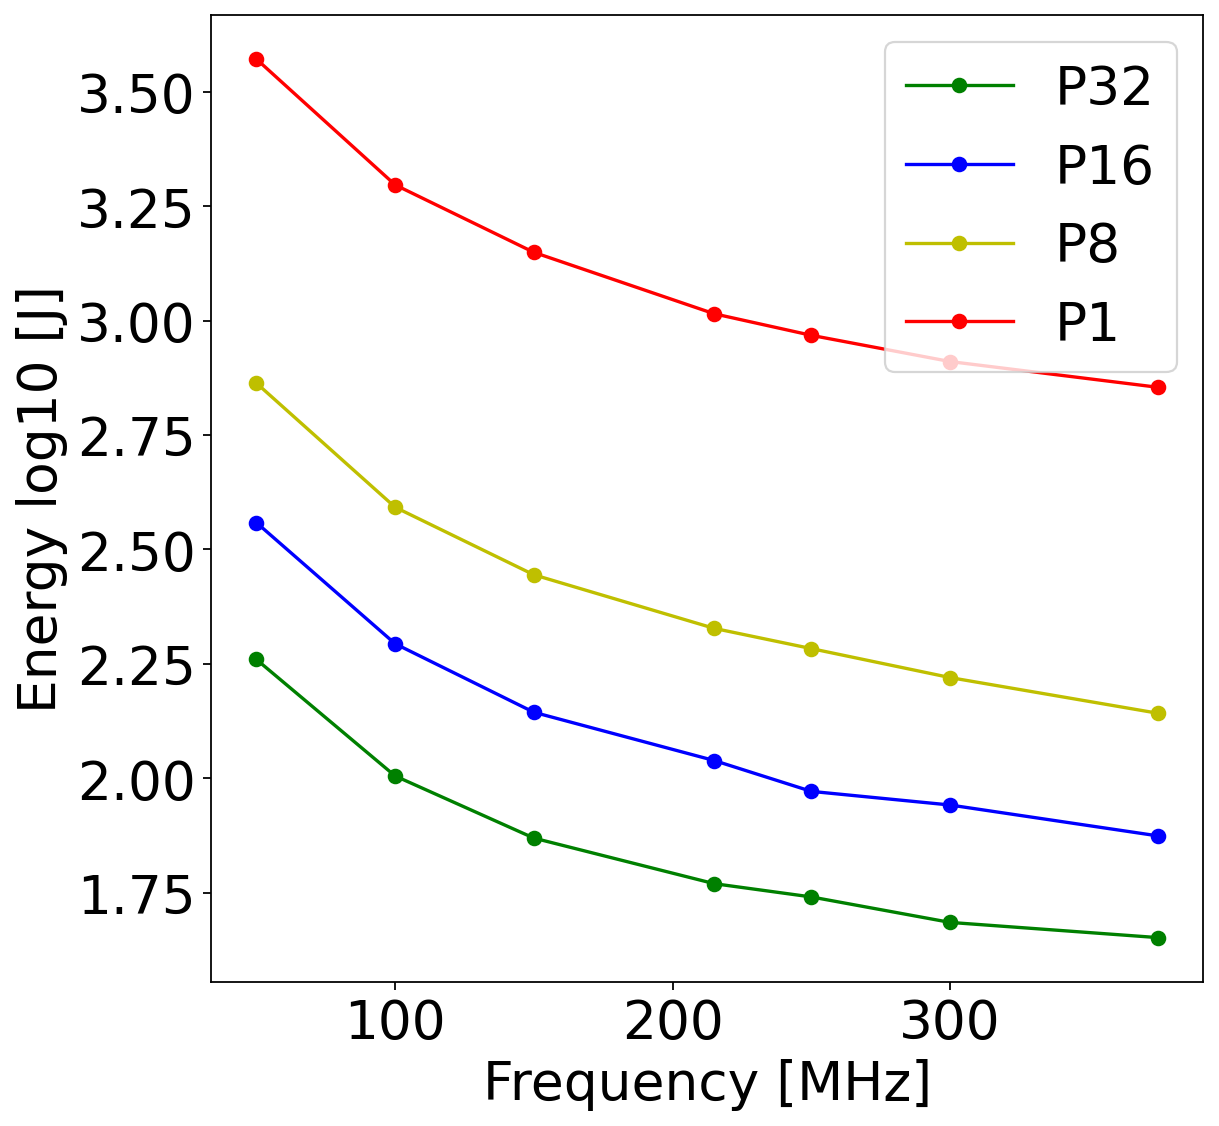

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = [375, 236, 44.845,
300, 195, 48.414,
250, 167, 55.032,
215, 145, 58.829,
150, 105, 73.990,
100, 71, 101.134,
50, 35, 181.750,
375, 130, 74.805,
300, 105, 87.393,
250, 88, 93.597,
215, 76, 109.306,
150, 53, 139.347,
100, 35, 196.697,
50, 17, 361.815,
375, 65, 138.635,
300, 52, 165.928,
250, 43, 191.968,
215, 37, 212.532,
150, 26, 278.281,
100, 17, 390.941,
50 ,  8, 729.939,
375, 12, 714.737,
300, 10, 813.676,
250, 8, 928.440,
215, 7, 1034.701,
150, 5, 1409.458,
100, 3.3, 1979.160,
50 , 1.7, 3727.046,]

data = np.array(data).reshape((4,7,3))

plt.figure(figsize=(8,8), dpi=160)
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 24}
plt.rc('font', **font)
m = 'o'
for i, (l,c,xm) in enumerate(zip(['P32','P16','P8','P1'], 
                              ['r','y','b','g'][::-1],
                              ['o','o','o','o'])):
    plt.plot(data[i,:,0], np.log10(data[i,:,2]), marker=m, label=l,color=c)

plt.xlabel('Frequency [MHz]')
plt.ylabel('Energy log10 [J]')
plt.legend()
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# m = '.'
# for i, (l,c,xm) in enumerate(zip(['P32','P16','P8','P1'], 
#                               ['r','g','b','y'],
#                               ['o','o','o','o'])):
#     ax.scatter(data[i,:,0], data[i,:,1], np.log2(data[i,:,2]), marker=m, label=l,color=c)

# ax.set_xlabel('Frequency [MHz]')
# ax.set_ylabel('Throughput [fps]')
# ax.set_zlabel('Energy [J]')
# ax.legend()
# plt.show()